<a href="https://colab.research.google.com/github/RicardoMiles/Dissertation-template/blob/main/VisulizedUpdateSingleLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/SummerProject/src')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/SummerProject/src


In [20]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [21]:
# 定义包含CSV文件的文件夹路径
current_dir = os.getcwd()
root_dir = os.path.dirname(current_dir)
data_dir = os.path.join(root_dir, 'Data')
left_data = os.path.join(data_dir,'left')
right_data = os.path.join(data_dir,'right')

folder_path = left_data

# 获取left文件夹中所有CSV文件的列表
csv_files_left = [os.path.join(left_data, file) for file in os.listdir(left_data) if file.endswith('.csv')]
# 获取right文件夹中所有CSV文件的列表
csv_files_right = [os.path.join(right_data, file) for file in os.listdir(right_data) if file.endswith('.csv')]

# 初始化存储所有特征和标签的列表
all_features = []
all_labels = []

# 初始化CSV文件计数器
csv_files_count = 0

In [22]:
print(f"Number of left files: {len(csv_files_left)}")
print(f"Number of right files: {len(csv_files_right)}")

Number of left files: 26
Number of right files: 26


In [23]:
# 定义特征提取函数
def extract_features(group):
    features = []
    # 时间域特征
    for col in group.columns[2:]:
        data = group[col].values
        features.append(data.mean())
        features.append(data.std())
        features.append(stats.skew(data))
        features.append(stats.kurtosis(data))
    return features

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime  # 导入datetime模块来获取当前时间

# 初始化CSV文件计数器
csv_files_count = 0
all_features = []  # 确保这个列表在代码的其他地方被初始化
all_labels = []  # 确保这个列表在代码的其他地方被初始化

# 处理left文件夹中的CSV文件
for file_name in csv_files_left:
    df = pd.read_csv(file_name)
    csv_files_count += 1  # 增加文件计数
    # 将数据按照epoch分组
    grouped = df.groupby(df.columns[1])  # 第二列是epoch分组的列
    for name, group in grouped:
        # 过滤掉time小于0的数据
        group = group[group[df.columns[0]] >= 0]  # 假设time列是第一列
        if len(group) == 81:  # 确保过滤后有81条数据
            # 提取特征
            features = group.iloc[:, 2:].values  # 第三列及以后是EEG通道信号
            # features = extract_features(group)
            all_features.append(features)
            # 获取标签
            all_labels.append('left')

# 处理right文件夹中的CSV文件
for file_name in csv_files_right:
    df_right = pd.read_csv(file_name)
    csv_files_count += 1  # 增加文件计数
    # 将数据按照epoch分组
    grouped_right = df_right.groupby(df_right.columns[1])  # 第二列是epoch分组的列
    for name, group in grouped_right:
        # 过滤掉time小于0的数据
        group = group[group[df_right.columns[0]] >= 0]  # 假设time列是第一列
        if len(group) == 81:  # 确保过滤后有81条数据
            # 提取特征
            features = group.iloc[:, 2:].values  # 第三列及以后是EEG通道信号
            # features = extract_features(group)
            all_features.append(features)
            # 获取标签
            all_labels.append('right')

# 将特征和标签转换为NumPy数组
features_array = np.array(all_features)
labels_array = np.array(all_labels)

# 打印特征数组的形状
print(f"Features array shape: {features_array.shape}")

# 打印标签数组的形状
print(f"Labels array shape: {labels_array.shape}")

# 打印当前处理的时间
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Current processing time: {current_time}")

# 打印处理的CSV文件数量
print(f"Total CSV files processed: {csv_files_count}")

Features array shape: (7220, 81, 101)
Labels array shape: (7220,)
Current processing time: 2024-11-21 16:08:28
Total CSV files processed: 52


In [25]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 初始化标签编码器
label_encoder = LabelEncoder()

# 将训练集和测试集的标签转换为数值
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 确保转换后的标签是正确的数据类型
y_train_encoded = y_train_encoded.astype('int32')
y_test_encoded = y_test_encoded.astype('int32')

X_train shape: (5776, 81, 101), y_train shape: (5776,)
X_test shape: (1444, 81, 101), y_test shape: (1444,)
Epoch 1/35
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5061 - loss: 0.7729 - val_accuracy: 0.5367 - val_loss: 0.7045
Epoch 2/35
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5303 - loss: 0.7259 - val_accuracy: 0.5298 - val_loss: 0.7084
Epoch 3/35
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5460 - loss: 0.7008 - val_accuracy: 0.5256 - val_loss: 0.7008
Epoch 4/35
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5697 - loss: 0.6879 - val_accuracy: 0.5381 - val_loss: 0.6975
Epoch 5/35
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5900 - loss: 0.6732 - val_accuracy: 0.5090 - val_loss: 0.6995
Epoch 6/35
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5980 - loss: 0.6635 - val_accuracy: 0.5332 - val_loss: 0.6986
Epoch 7/35
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5938 - loss: 0.6631 - val_accuracy: 0.5319 - val_loss: 0.6968
Epoch 8/3

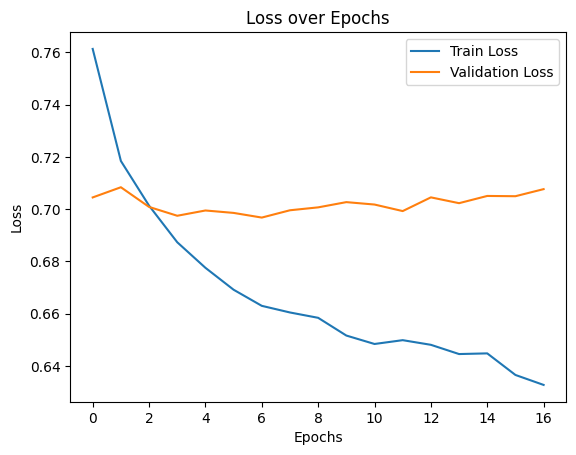

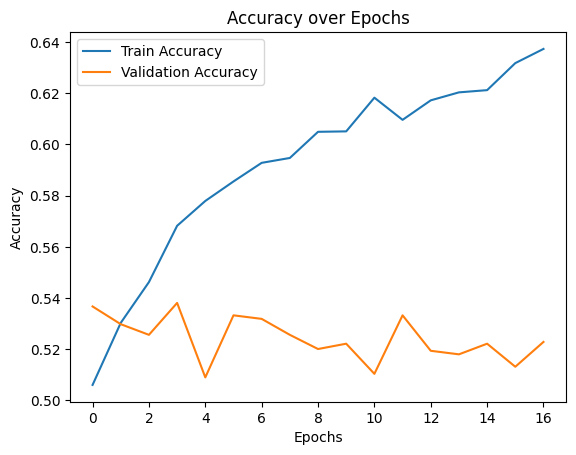

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 假设 X_train, X_test, y_train, y_test 已经定义并准备好了
# 打印训练数据的形状，确保维度一致
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train_encoded.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test_encoded.shape}")

# 构建LSTM模型
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))  # 输入层
model.add(LSTM(units=30, return_sequences=False))  # 输出最后一个时间步
model.add(Dropout(0.4))  # 添加Dropout层，防止过拟合
model.add(Dense(1, activation='sigmoid'))  # 二分类输出

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 启用早停策略
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# 训练模型
history = model.fit(
    X_train, y_train_encoded,
    epochs=35,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping]
)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 可视化训练过程
import matplotlib.pyplot as plt

# 绘制训练和验证损失
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制训练和验证准确率
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [28]:
# 预测测试集
predictions = model.predict(X_test)

# 将概率转换为类别
predicted_classes = (predictions > 0.5).astype("int32")

# 打印预测结果
print(predicted_classes)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [29]:
# 计算精确度、召回率和F1分数
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test_encoded, predicted_classes)
recall = recall_score(y_test_encoded, predicted_classes)
f1 = f1_score(y_test_encoded, predicted_classes)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 计算混淆矩阵
cm = confusion_matrix(y_test_encoded, predicted_classes)
print("Confusion Matrix:")
print(cm)

Precision: 0.4962518740629685
Recall: 0.4755747126436782
F1 Score: 0.4856933235509905
Confusion Matrix:
[[412 336]
 [365 331]]
